<a href="https://colab.research.google.com/github/ehsankarami1358/ImagingSVHN/blob/main/seq_vs_functional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [16]:
df=pd.read_excel('Folds5x2_pp.xlsx')
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [17]:
def get_outputs(data):
    y1=data.pop('PE')
    y1=np.array(y1)
    y2=data.pop('V')
    y2=np.array(y2)
    return y1,y2

In [18]:
train, test = train_test_split(df, test_size=0.2,random_state=42)

y_train=get_outputs(train)
y_test=get_outputs(test)

min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(train)
X_test = min_max_scaler.transform(test)

In [28]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten,Input
from tensorflow.keras.optimizers import Adam

In [29]:
input_layer=Input(shape=(3,),name='input_layer')
Layer_1=Dense(128,activation='relu',name='Layer_1')(input_layer)
Layer_2=Dense(64,activation='relu',name='Layer_2')(Layer_1)

y1_output=Dense(1,activation='linear',name='y1_output')(Layer_2)

Branched_layer=Dense(32,activation='relu',name='Branched_layer')(Layer_2)

y2_output=Dense(1,activation='linear',name='y2_output')(Branched_layer)

model=Model(inputs=input_layer,outputs=[y1_output,y2_output])


In [30]:
model.compile(loss='mse', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 182141.5625 - y1_output_loss: 180008.3438 - y2_output_loss: 2129.7583 - val_loss: 2460.3545 - val_y1_output_loss: 2323.2092 - val_y2_output_loss: 135.6785
Epoch 2/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1892.6523 - y1_output_loss: 1753.1124 - y2_output_loss: 139.5480 - val_loss: 1716.8040 - val_y1_output_loss: 1573.1703 - val_y2_output_loss: 143.3193
Epoch 3/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1772.1348 - y1_output_loss: 1625.4757 - y2_output_loss: 146.6510 - val_loss: 1592.2389 - val_y1_output_loss: 1441.0493 - val_y2_output_loss: 150.7703
Epoch 4/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1557.1772 - y1_output_loss: 1402.1466 - y2_output_loss: 155.0261 - val_loss: 1467.5211 - val_y1_output_loss: 1309.1510 - val_y2_output_loss: 157.9113
Epoch 5/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1453.2272 - y1_output_loss: 1291.9977 - y2_output_loss: 161.2153 - val_loss: 1326.3971 - v

In [31]:
prediction=model.predict(X_test)
prediction_energy=prediction[0]
prediction_volume=prediction[1]

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


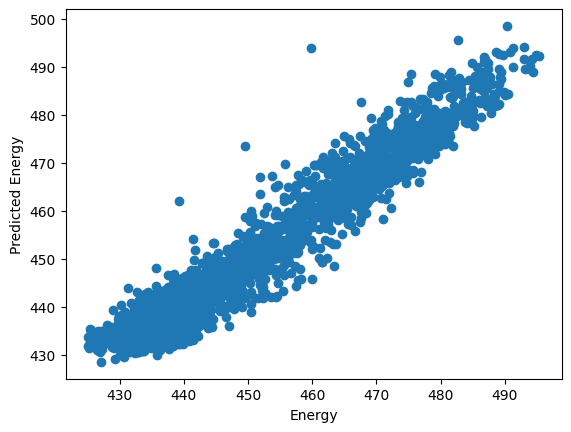

In [32]:
plt.scatter(y_test[0],prediction_energy)
plt.xlabel('Energy')
plt.ylabel('Predicted Energy')
plt.show()

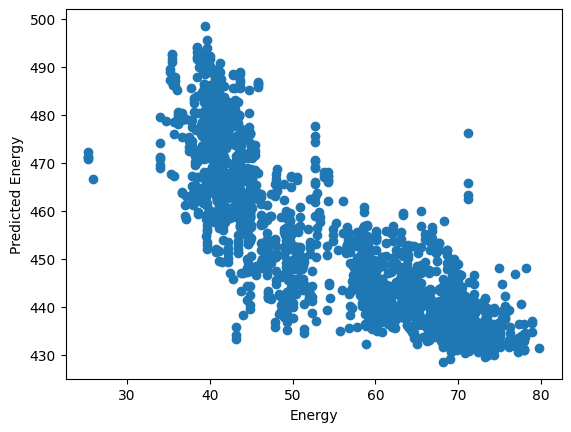

In [33]:
plt.scatter(y_test[1],prediction_energy)
plt.xlabel('Energy')
plt.ylabel('Predicted Energy')
plt.show()